In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

csv_path = '/content/drive/MyDrive/Colab Notebooks/A/steam.csv'

try:
    df = pd.read_csv(csv_path)
    print("CSV loaded successfully!")
    display(df.head(10))
except FileNotFoundError:
    print(f"Error: The file was not found at {csv_path}")
except Exception as e:
    print(f"An error occurred: {e}")

CSV loaded successfully!


,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99
5,60,Ricochet,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Valve Anti-Ch...,Action,Action;FPS;Multiplayer,0,2758,684,175,10,5000000-10000000,3.99
6,70,Half-Life,1998-11-08,1,Valve,Valve,windows;mac;linux,0,Single-player;Multi-player;Online Multi-Player...,Action,FPS;Classic;Action,0,27755,1100,1300,83,5000000-10000000,7.19
7,80,Counter-Strike: Condition Zero,2004-03-01,1,Valve,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,Action;FPS;Multiplayer,0,12120,1439,427,43,10000000-20000000,7.19
8,130,Half-Life: Blue Shift,2001-06-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player,Action,FPS;Action;Sci-fi,0,3822,420,361,205,5000000-10000000,3.99
9,220,Half-Life 2,2004-11-16,1,Valve,Valve,windows;mac;linux,0,Single-player;Steam Achievements;Steam Trading...,Action,FPS;Action;Sci-fi,33,67902,2419,691,402,10000000-20000000,7.19


### Játékok átlagos ára évenként a Steamen

Ez a szakasz a játékok átlagos árának alakulását vizsgálja évenként a Steam platformon. A kód kiszámolja az átlagárat minden évre, majd egy vonaldiagramon jeleníti meg az eredményt, hogy láthatóvá váljon az árak időbeli trendje.

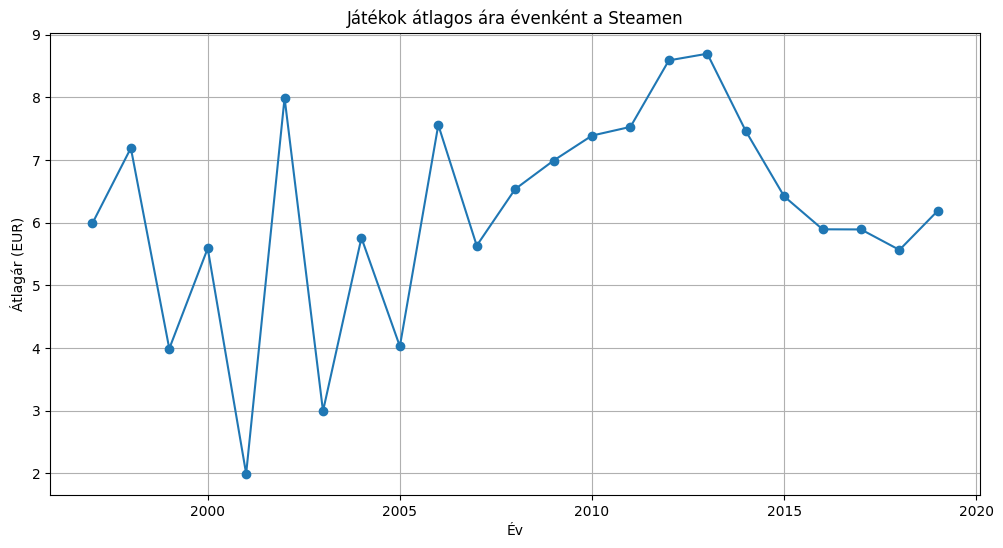

In [32]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['year'] = df['release_date'].dt.year

year_price = df.groupby('year')['price'].mean()

plt.figure(figsize=(12,6))
plt.plot(year_price.index, year_price.values, marker='o')
plt.title("Játékok átlagos ára évenként a Steamen")
plt.xlabel("Év")
plt.ylabel("Átlagár (EUR)")
plt.grid(True)
plt.show()


### Játék megjelenések száma évenként és hónaponként (Hőtérkép)

Ez a szakasz a játékok megjelenésének mintázatát vizsgálja évenként és hónaponként egy hőtérkép segítségével. A kód összesíti a megjelenések számát minden hónapban az egyes években, majd a hőtérkép vizuálisan megjeleníti a sűrűbben és ritkábban előforduló megjelenési időszakokat.

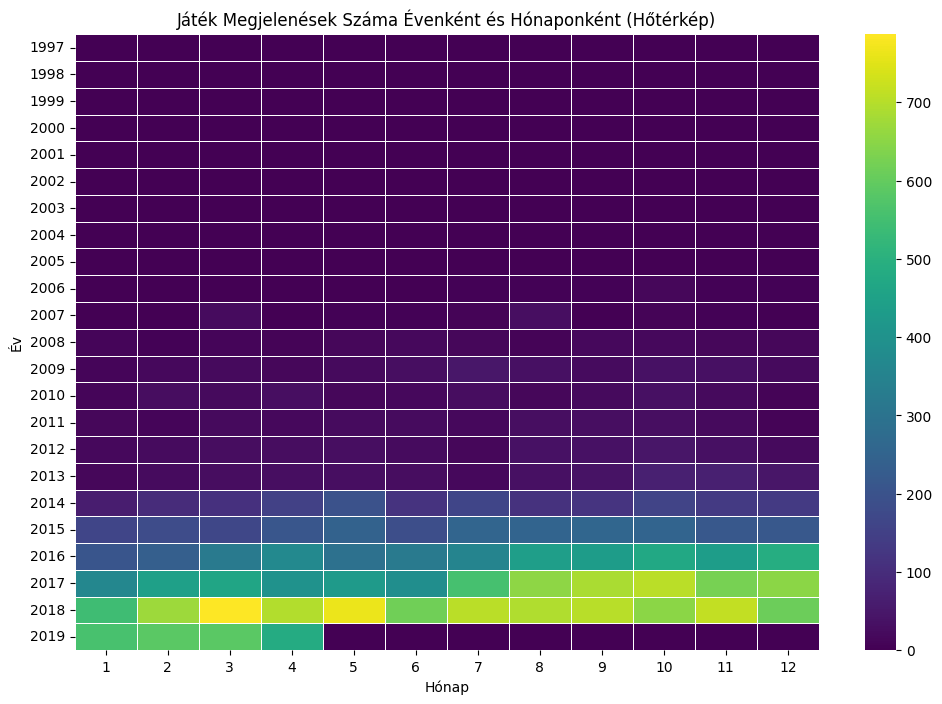

In [33]:
df['month'] = df['release_date'].dt.month
releases_heatmap_data = df.groupby(['year', 'month']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(releases_heatmap_data, cmap="viridis", fmt="d", linewidths=.5)
plt.title('Játék Megjelenések Száma Évenként és Hónaponként (Hőtérkép)')
plt.xlabel('Hónap')
plt.ylabel('Év')
plt.show()

### Játék árak eloszlása

Ez a szakasz a játékok árának eloszlását vizsgálja a Steam platformon. A kód egy hisztogramot készít, amely bemutatja, milyen gyakran fordulnak elő bizonyos ártartományok a játékok között.

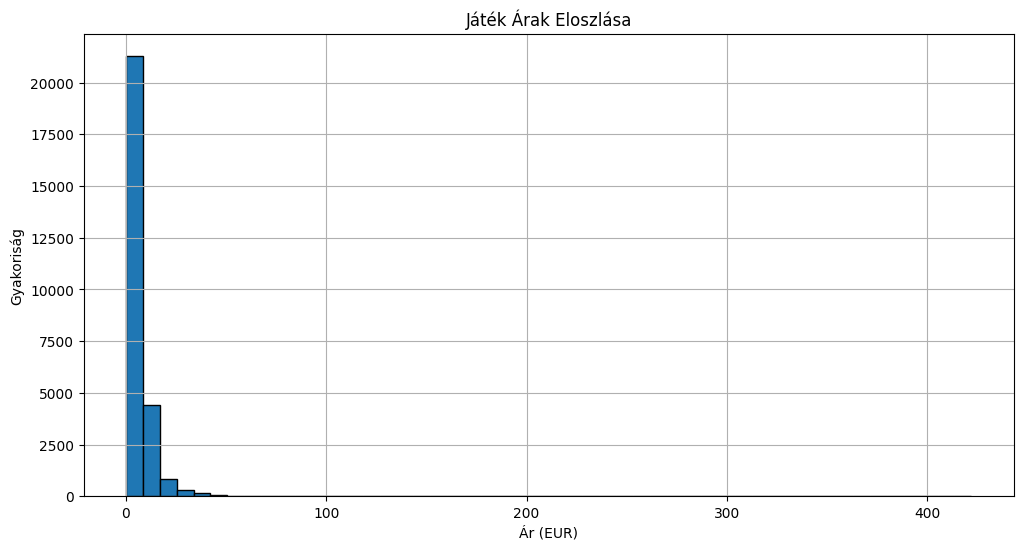

In [34]:
plt.figure(figsize=(12, 6))
plt.hist(df['price'], bins=50, edgecolor='black')
plt.title('Játék Árak Eloszlása')
plt.xlabel('Ár (EUR)')
plt.ylabel('Gyakoriság')
plt.grid(True)
plt.show()

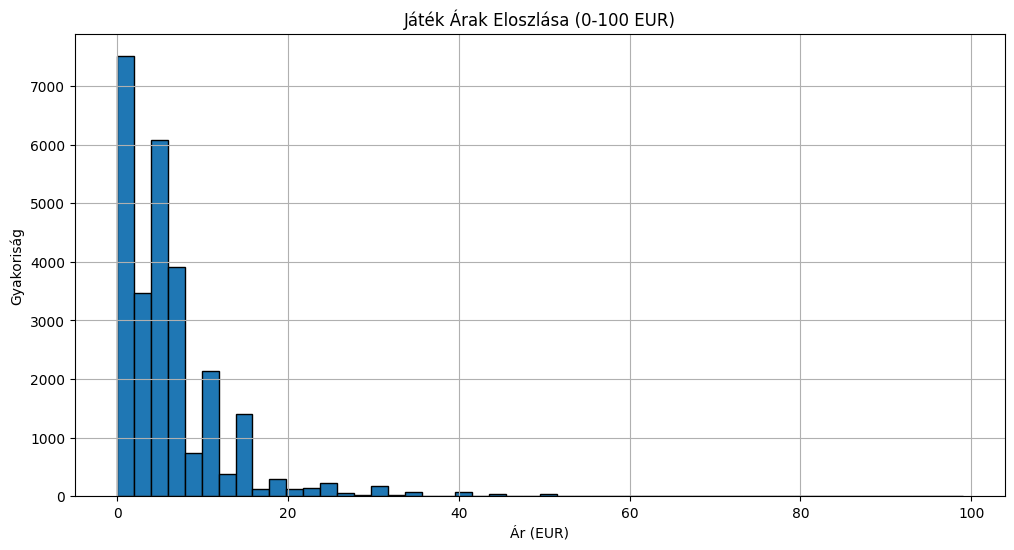

In [35]:
df_filtered_price = df[(df['price'] >= 0) & (df['price'] <= 100)]

plt.figure(figsize=(12, 6))
plt.hist(df_filtered_price['price'], bins=50, edgecolor='black')
plt.title('Játék Árak Eloszlása (0-100 EUR)')
plt.xlabel('Ár (EUR)')
plt.ylabel('Gyakoriság')
plt.grid(True)
plt.show()

### Játékok száma évenként

Ez a szakasz a Steam-en megjelenő játékok számának alakulását vizsgálja évenként. A kód megszámolja a játékok számát minden évre, majd egy oszlopdiagramon jeleníti meg az eredményt, hogy láthatóvá váljon a megjelenések számának időbeli trendje.

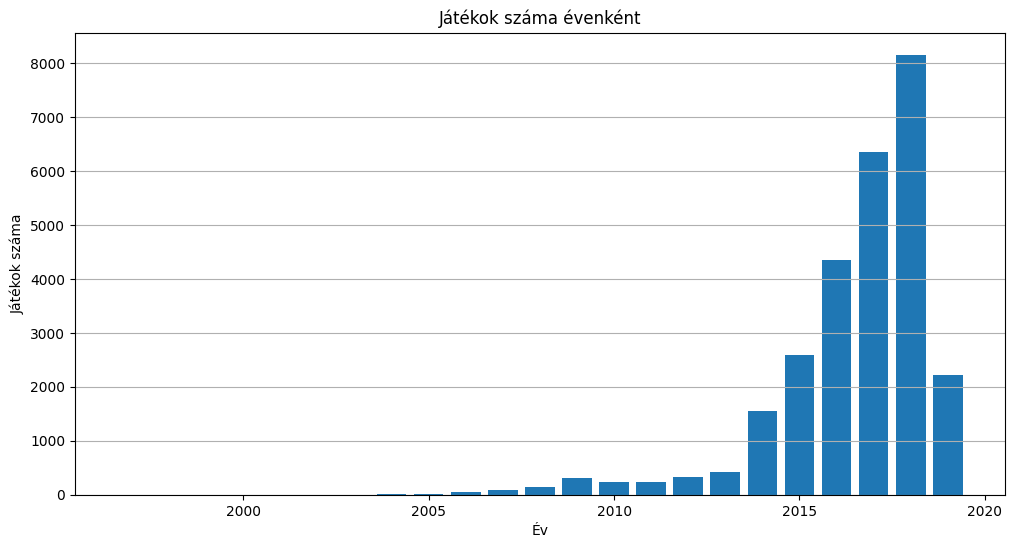

In [36]:
if 'year' not in df.columns:
    df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
    df['year'] = df['release_date'].dt.year

games_per_year = df['year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.bar(games_per_year.index, games_per_year.values)
plt.title('Játékok száma évenként')
plt.xlabel('Év')
plt.ylabel('Játékok száma')
plt.grid(axis='y')
plt.show()

### Top 20 Játék Műfaj Száma

Ez a szakasz a leggyakoribb játék műfajokat vizsgálja a Steam-en. A kód kinyeri az összes műfajt a datasetből, megszámolja az egyes műfajok előfordulását, majd egy oszlopdiagramon megjeleníti a 20 leggyakoribb műfajt.

<Figure size 1200x800 with 0 Axes>

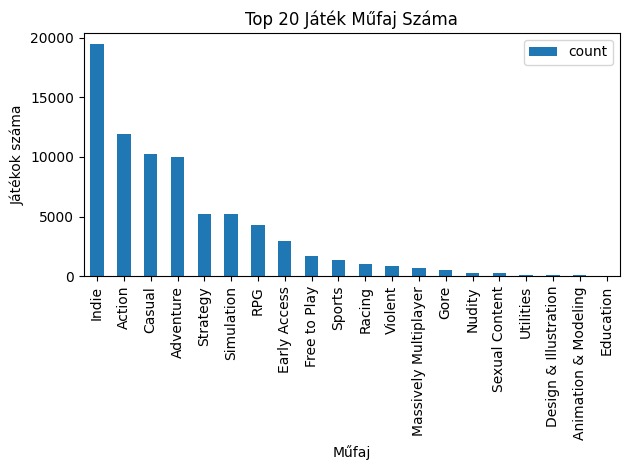

In [37]:
genres_list = df['genres'].str.split(';').sum()
genre_counts = Counter(genres_list)

genre_df = pd.DataFrame.from_dict(genre_counts, orient='index', columns=['count']).sort_values(by='count', ascending=False)

top_n = 20
plt.figure(figsize=(12, 8))
genre_df.head(top_n).plot(kind='bar')
plt.title(f'Top {top_n} Játék Műfaj Száma')
plt.xlabel('Műfaj')
plt.ylabel('Játékok száma')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Játékok száma az ajánlott életkor szerint

Ez a szakasz a játékok számának eloszlását vizsgálja az ajánlott életkor szerint a Steam-en. A kód megszámolja a játékok számát minden korosztályra, majd egy oszlopdiagramon jeleníti meg az eredményt, hogy láthatóvá váljon a korosztály szerinti megoszlás.

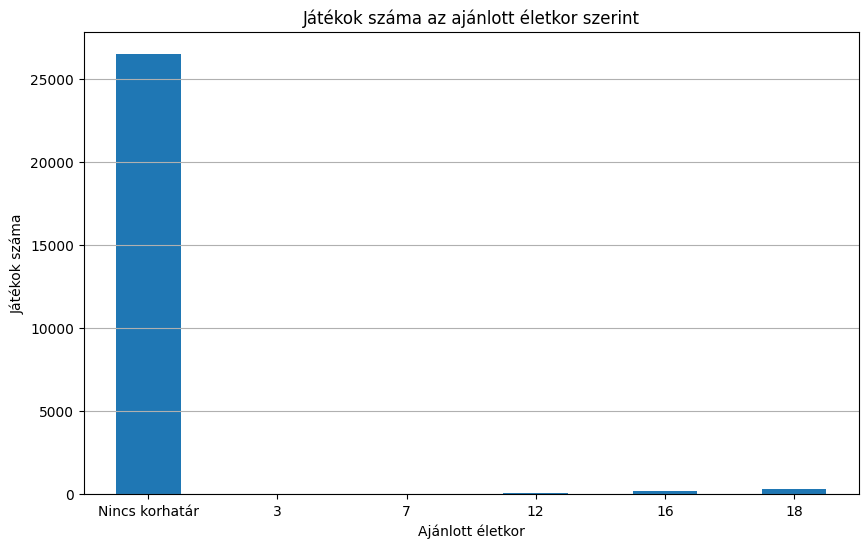

In [38]:
age_counts = df['required_age'].value_counts().sort_index()

age_counts = age_counts.rename(index={0: 'Nincs korhatár'})

plt.figure(figsize=(10, 6))
age_counts.plot(kind='bar')
plt.title('Játékok száma az ajánlott életkor szerint')
plt.xlabel('Ajánlott életkor')
plt.ylabel('Játékok száma')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

### Játékok száma támogatott platformonként

Ez a szakasz a játékok platformtámogatását vizsgálja a Steam-en. A kód megszámolja, hány játék érhető el Windows, Mac és Linux platformon, majd egy oszlopdiagramon megjeleníti az eredményt, hogy láthatóvá váljon a platform szerinti megoszlás.

<Figure size 1000x600 with 0 Axes>

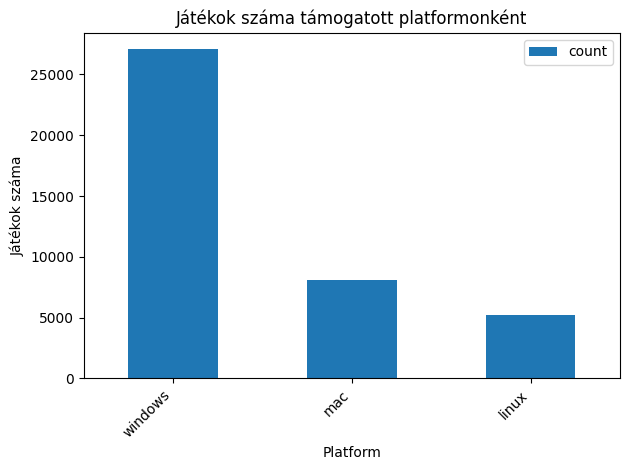

In [39]:
platforms_list = df['platforms'].str.split(';').sum()
platform_counts = Counter(platforms_list)

platform_df = pd.DataFrame.from_dict(platform_counts, orient='index', columns=['count']).sort_values(by='count', ascending=False)

plt.figure(figsize=(10, 6))
platform_df.plot(kind='bar')
plt.title('Játékok száma támogatott platformonként')
plt.xlabel('Platform')
plt.ylabel('Játékok száma')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Pozitív értékelési arány az ár függvényében

Ez a szakasz a játékok pozítiv értékelési aránya és az ár közötti kapcsolatot vizsgálja. A kód egy kétváltozós hisztogramot (2D histplot) használ az adatok megjelenítésére, amely a játékok árát (EUR-ban) és a pozitív értékelések arányát (%) ábrázolja.

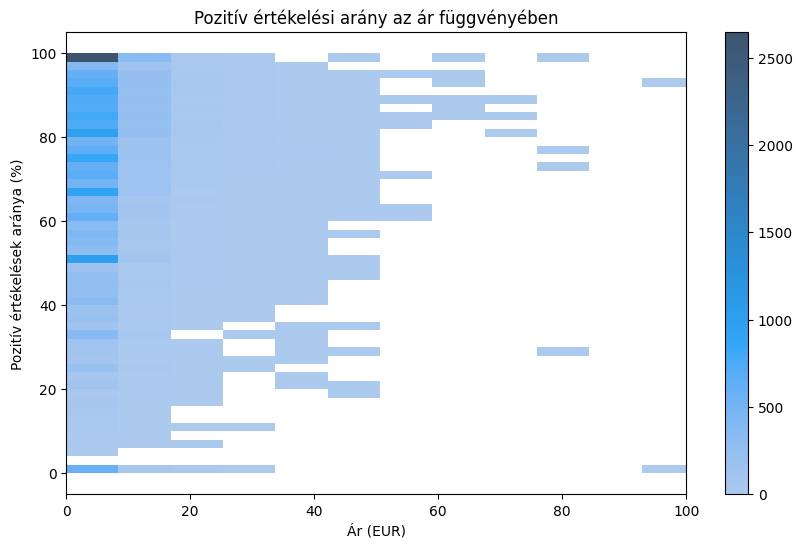

In [40]:
df['rating_percent'] = df['positive_ratings'] / (df['positive_ratings'] + df['negative_ratings']) * 100

plt.figure(figsize=(10,6))
sns.histplot(
    data=df,
    x='price',
    y='rating_percent',
    bins=(50, 50),
    cbar=True
)
plt.xlim(0, 100)
plt.title("Pozitív értékelési arány az ár függvényében")
plt.xlabel("Ár (EUR)")
plt.ylabel("Pozitív értékelések aránya (%)")
plt.show()

### Pozitív értékelési arány az ár függvényében

Ebben a szakaszban a Steam-játékok pozitív értékelési aránya és ára közötti összefüggést vizsgáljuk.
A kód egy hexbin-diagramot hoz létre, amely hatszög alakú cellákban ábrázolja az adatpontok sűrűségét.

A vízszintes tengelyen a játékok ára (EUR-ban), a függőleges tengelyen pedig a pozitív értékelések aránya (%) látható.
A cellák színe a pontsűrűséget mutatja logaritmikus skálán: a sötétebb árnyalatok több játékot jeleznek az adott ár–értékelési arány kombinációban.

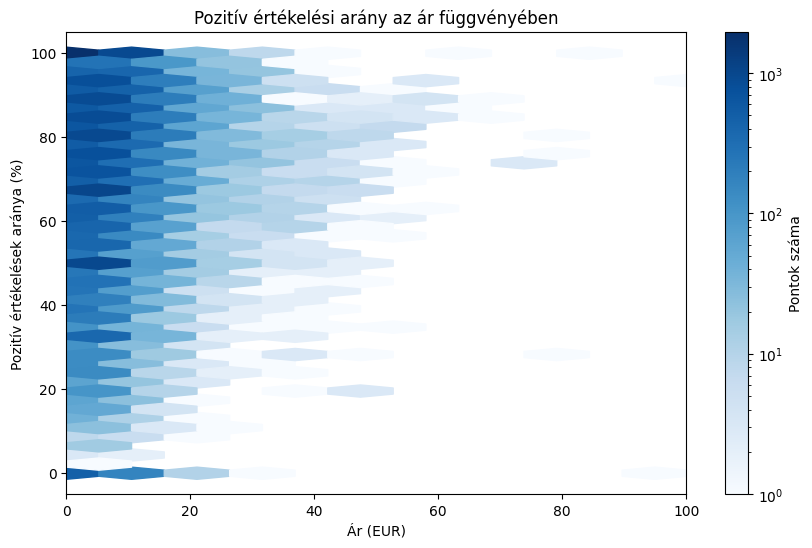

In [41]:
plt.figure(figsize=(10,6))
plt.hexbin(
    df['price'],
    df['rating_percent'],
    gridsize=40,
    cmap='Blues',
    bins='log'
)
plt.xlim(0, 100)
plt.colorbar(label='Pontok száma')
plt.title("Pozitív értékelési arány az ár függvényében")
plt.xlabel("Ár (EUR)")
plt.ylabel("Pozitív értékelések aránya (%)")
plt.show()


### Pozitív értékelési arány a korhatár függvényében

Ez a szakasz azt vizsgálja, hogyan alakul a Steam-játékok pozitív értékelési aránya a különböző korhatár-besorolások szerint.
A kód egy boxplotot (dobozdiagramot) használ, amely az egyes korhatárokhoz tartozó eloszlásokat mutatja be.

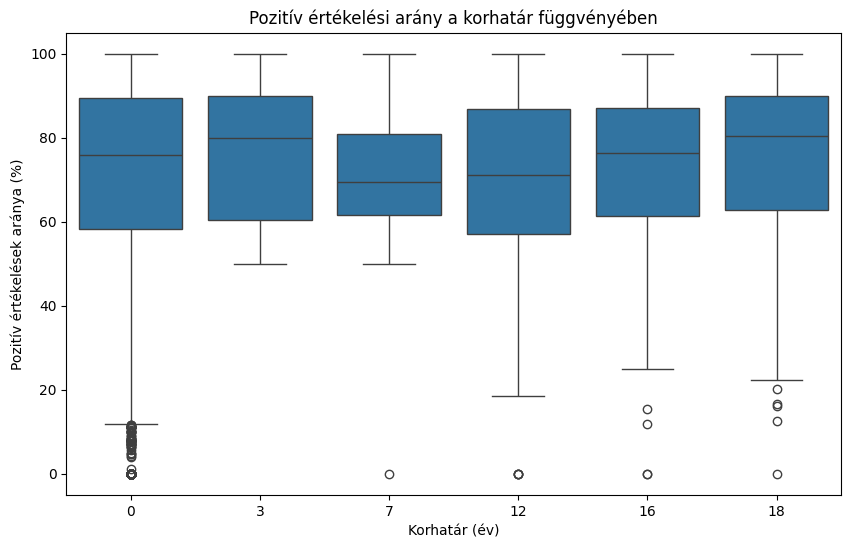

In [42]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='required_age', y='rating_percent')
plt.title("Pozitív értékelési arány a korhatár függvényében")
plt.xlabel("Korhatár (év)")
plt.ylabel("Pozitív értékelések aránya (%)")
plt.show()

### Pozitív értékelési arány eloszlása a kiadási év függvényében

Ez a szakasz a Steam-játékok pozitív értékelési arányának eloszlását vizsgálja a kiadási év függvényében.
A kód egy violin plotot készít, amely a különböző évekhez tartozó értékelési arányok eloszlását mutatja.

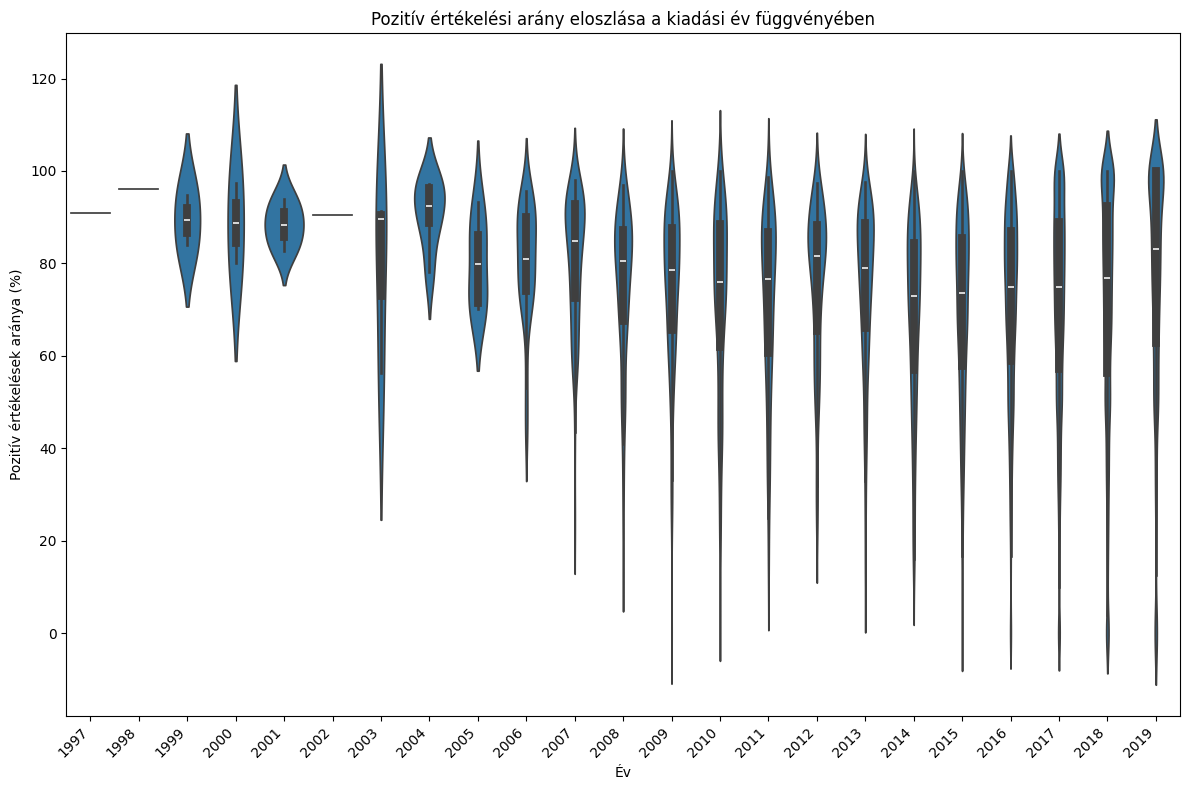

In [43]:
plt.figure(figsize=(12, 8))
sns.violinplot(data=df, x='year', y='rating_percent')
plt.title("Pozitív értékelési arány eloszlása a kiadási év függvényében")
plt.xlabel("Év")
plt.ylabel("Pozitív értékelések aránya (%)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Pozitív értékelések eloszlása korhatáronként

Ebben a szakaszban a Steam-játékok pozitív értékelési arányának eloszlását vizsgáljuk a korhatár-besorolás szerint.
A kód egy FacetGrid segítségével több hisztogramot készít, ahol minden panel egy adott korhatárhoz tartozó játékok eloszlását mutatja.

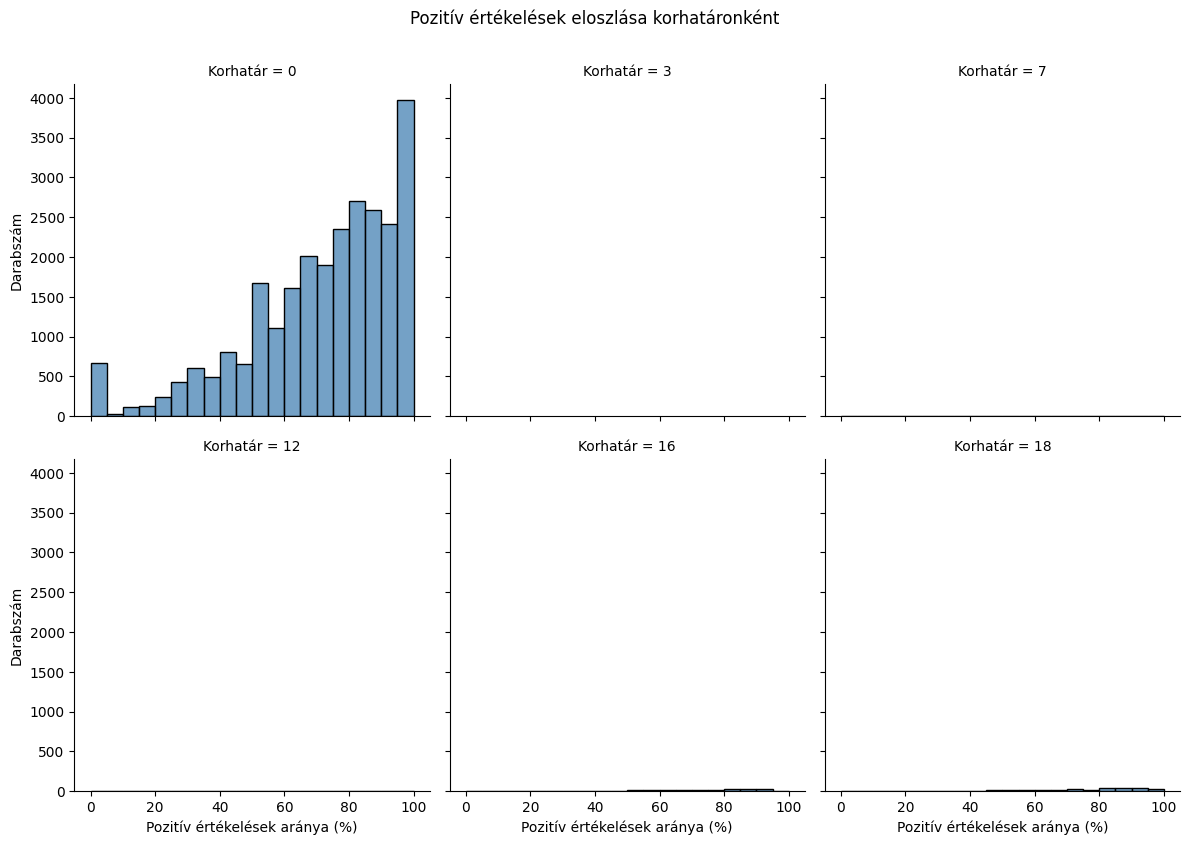

In [44]:
g = sns.FacetGrid(df, col="required_age", col_wrap=3, height=4, sharex=True, sharey=True)
g.map_dataframe(sns.histplot, x="rating_percent", bins=20, color="steelblue")
g.set_titles("Korhatár = {col_name}")
g.set_axis_labels("Pozitív értékelések aránya (%)", "Darabszám")
plt.suptitle("Pozitív értékelések eloszlása korhatáronként", y=1.05)
plt.show()

### Pozitív értékelések eloszlása a korhatár függvényében

Ez a szakasz a Steam-játékok pozitív értékelési arányának eloszlását mutatja be a korhatár-besorolások szerint.
A kód egy kernel-sűrűségbecslést (KDE-plot) alkalmaz, amely simított görbékkel ábrázolja az értékelési arányok eloszlását minden korosztály esetében.

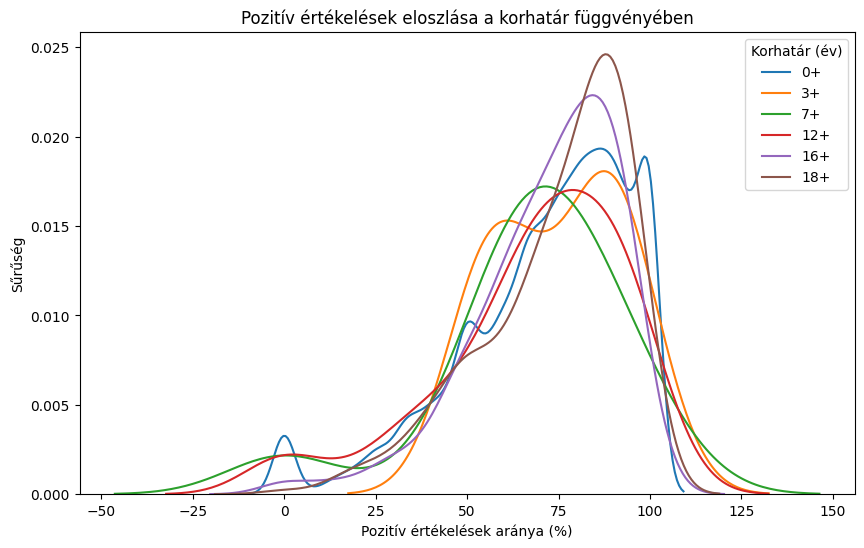

In [45]:
plt.figure(figsize=(10,6))
for age in sorted(df['required_age'].unique()):
    subset = df[df['required_age'] == age]
    sns.kdeplot(subset['rating_percent'], label=f"{age}+")
plt.title("Pozitív értékelések eloszlása a korhatár függvényében")
plt.xlabel("Pozitív értékelések aránya (%)")
plt.ylabel("Sűrűség")
plt.legend(title="Korhatár (év)")
plt.show()

### Pozitív értékelések eloszlása a korhatár függvényében

Ebben a szakaszban a Steam-játékok pozitív értékelési arányának eloszlását vizsgáljuk a különböző korhatár-besorolások mentén.
A kód egy violin plotot használ, amely a sűrűségeloszlást és a boxplot statisztikáit egyesíti.

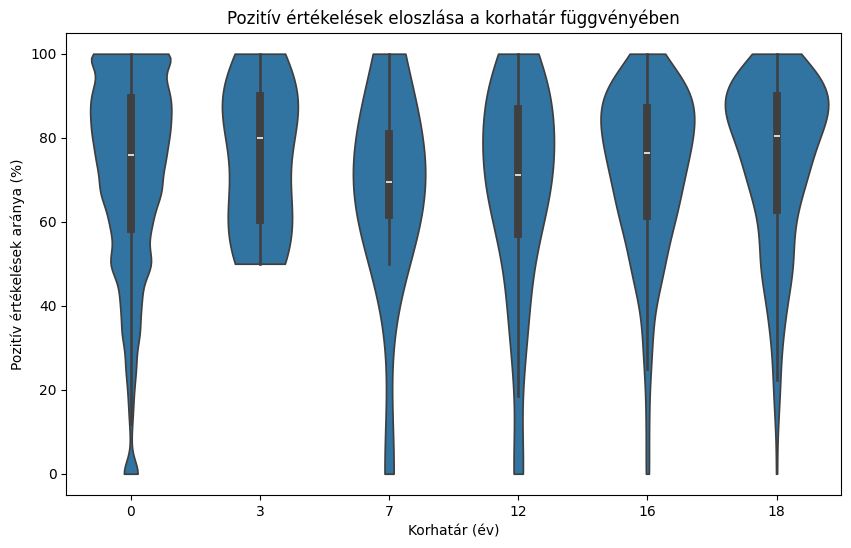

In [46]:
plt.figure(figsize=(10,6))
sns.violinplot(data=df, x="required_age", y="rating_percent", inner="box", cut=0)
plt.title("Pozitív értékelések eloszlása a korhatár függvényében")
plt.xlabel("Korhatár (év)")
plt.ylabel("Pozitív értékelések aránya (%)")
plt.show()